# Clustering
Identifying support and resistance by clustering on a price series

### Load config

In [1]:
import yaml
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np

from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame

with open("../config.yaml") as f:
    config = yaml.safe_load(f)

stock_client = StockHistoricalDataClient(config['alpaca']['key'], config['alpaca']['secret'])

In [2]:
symbol = "SPY"

request_params = StockBarsRequest(
                        symbol_or_symbols=symbol,
                        timeframe=TimeFrame.Day,
                        start=datetime.datetime(2022, 1, 1),
                        end=datetime.datetime(2023, 1, 1)
                 )

bars = stock_client.get_stock_bars(request_params).df.loc[symbol]

In [3]:
bars

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-01-03 05:00:00+00:00,476.30,477.85,473.85,477.71,72604064.0,534803.0,476.526964
2022-01-04 05:00:00+00:00,479.22,479.98,475.58,477.55,71129958.0,565259.0,477.868706
2022-01-05 05:00:00+00:00,477.16,477.98,468.29,468.38,102085598.0,784945.0,473.338984
2022-01-06 05:00:00+00:00,467.89,470.82,465.43,467.94,86499197.0,803296.0,468.480666
2022-01-07 05:00:00+00:00,467.95,469.20,464.65,466.09,84895774.0,623749.0,466.940793
...,...,...,...,...,...,...,...
2022-12-23 05:00:00+00:00,379.65,383.06,378.03,382.91,58757557.0,441157.0,381.501493
2022-12-27 05:00:00+00:00,382.79,383.15,379.65,381.40,51494435.0,427772.0,381.776690
2022-12-28 05:00:00+00:00,381.33,383.39,376.42,376.66,70660057.0,500857.0,379.062108


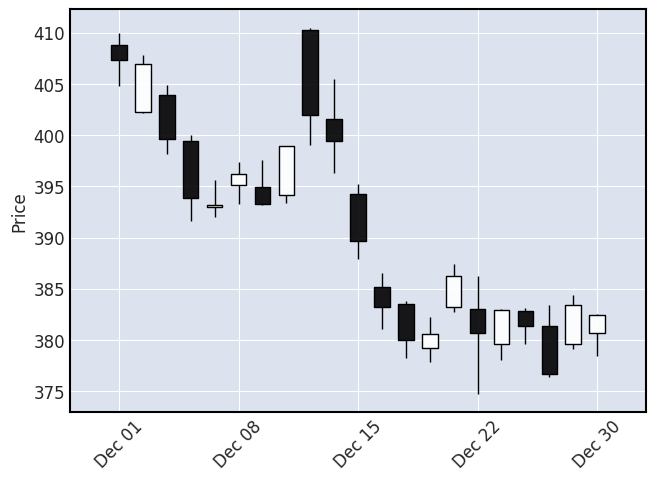

In [4]:
bars = bars[(bars.index.month == 12)]
mpf.plot(bars, type="candle")

In [5]:
prices = bars.drop(["volume", "vwap", "trade_count"], axis=1).unstack()

prices

       timestamp                
open   2022-12-01 05:00:00+00:00    408.77
       2022-12-02 05:00:00+00:00    402.25
       2022-12-05 05:00:00+00:00    403.95
       2022-12-06 05:00:00+00:00    399.42
       2022-12-07 05:00:00+00:00    392.94
                                     ...  
close  2022-12-23 05:00:00+00:00    382.91
       2022-12-27 05:00:00+00:00    381.40
       2022-12-28 05:00:00+00:00    376.66
       2022-12-29 05:00:00+00:00    383.44
       2022-12-30 05:00:00+00:00    382.43
Length: 84, dtype: float64

/home/liak/project/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


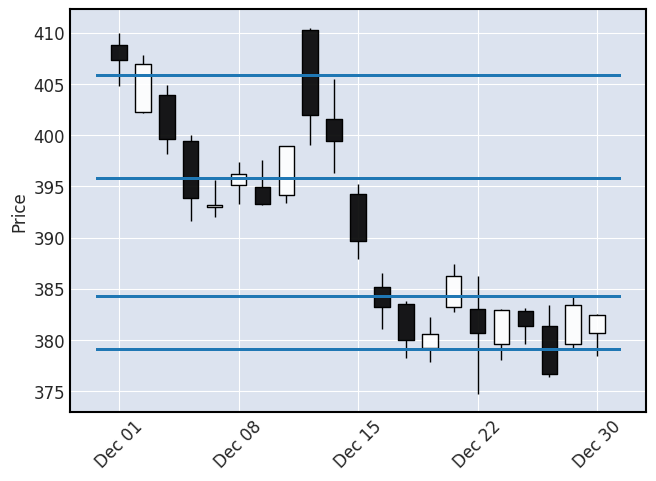

In [6]:
from sklearn.cluster import k_means

levels = k_means(np.expand_dims(prices.values, 1), 4)[0]
mpf.plot(bars, type="candle", hlines=list(levels.flatten()))